# CallableGraph Examples

## Imports

In [ ]:
from typing import Tuple, List, Dict, Any

from akita_callable.callable import CallableGraphWithTimings
from akita_callable.execution_log import ExecutionLog
from akita_callable.visualisation import to_graphviz, Orientation

## Define Functions

In [2]:
def my_halve(x: int) -> int:
    return x // 2

In [3]:
def my_add(*x: int) -> int:
    return sum(x)

In [4]:
def my_xor(x: int, y: int) -> int:
    return x ^ y

In [5]:
def tuple_example(x: int) -> Tuple[int, str]:
    return x, str(x)

In [6]:
def squared_sum(x: int, y: int) -> int:
    return x ** 2 + y ** 2

In [7]:
def listed(x: int, y: int) -> List[Dict[str, Any]]:
    return [dict(x=x, y=y)]

## Build CallableGraphWithTimings (with default return and no subgraphs)

In [8]:
graph = (
    CallableGraphWithTimings.builder()
    .with_edge(hash, str, hash, inputs="input_0", outputs="hashed_twice")
    .with_edge(my_halve, inputs="input_1", outputs="halved")
    .with_edge(
        my_add, str, inputs=("hashed_twice", "halved", "input_1"), outputs="added"
    )
    .with_edge(my_xor, inputs=("halved", "hashed_twice"), outputs="xored")
    .with_edge(tuple_example, inputs="halved", outputs=("t_0", "t_1"))
    .with_edge(squared_sum, inputs=("halved", "hashed_twice"), outputs="squared_sum")
    .build()
)

## Visualise

All nodes have the same `alpha` value or transluscence.

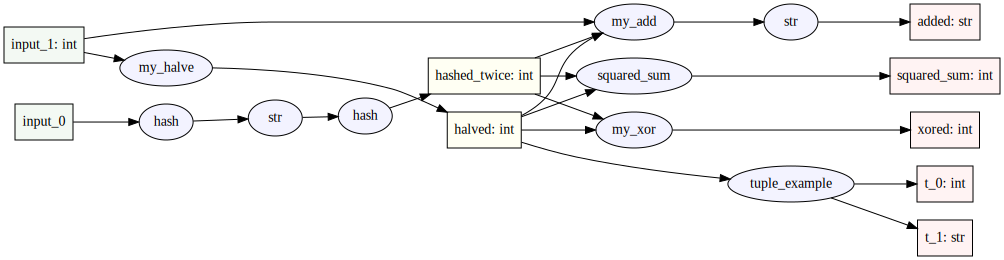

In [9]:
to_graphviz(graph)

# Orientation
By default, the orientation is "left to right". Other choices are as follows.

In [10]:
help(Orientation)

Help on class Orientation in module akita_callable.visualisation._visualisation_info:

class Orientation(builtins.str, enum.Enum)
 |  Orientation(value, names=None, *, module=None, qualname=None, type=None, start=1)
 |  
 |  An enum to specify the orientation of callable graph visualisations.
 |  
 |  Method resolution order:
 |      Orientation
 |      builtins.str
 |      enum.Enum
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  BOTTOM_TO_TOP = <Orientation.BOTTOM_TO_TOP: 'BT'>
 |  
 |  LEFT_TO_RIGHT = <Orientation.LEFT_TO_RIGHT: 'LR'>
 |  
 |  RIGHT_TO_LEFT = <Orientation.RIGHT_TO_LEFT: 'RL'>
 |  
 |  TOP_TO_BOTTOM = <Orientation.TOP_TO_BOTTOM: 'TB'>
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from enum.Enum:
 |  
 |  name
 |      The name of the Enum member.
 |  
 |  value
 |      The value of the Enum member.
 |  
 |  ----------------------------------------------------------------

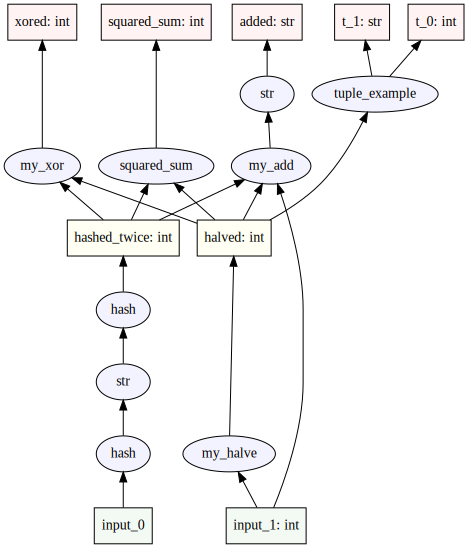

In [11]:
to_graphviz(graph, orientation=Orientation.BOTTOM_TO_TOP)

## Output (with default return)

In [12]:
data, execution_times = graph(input_0="to_hash", input_1=8)

In [13]:
data

{'input_0': 'to_hash',
 'input_1': 8,
 'halved': 4,
 'hashed_twice': 8869828523515365224,
 'added': '8869828523515365236',
 'xored': 8869828523515365228,
 'squared_sum': 78673858036566763856460569618108570192,
 't_0': 4,
 't_1': '4'}

## Build `CallableGraphWithTimings` (with subgraphs)

In [14]:
inner_graph = (
    CallableGraphWithTimings.builder()
    .with_edge(my_halve, str, hash, inputs="inner_input", outputs="inner_output_0")
    .with_edge(str, hash, inputs="inner_input", outputs="inner_output_1")
)

middle_graph = (
    CallableGraphWithTimings.builder()
    .with_subgraph(other=inner_graph, name="inner")
    .with_edge(my_halve, str, hash, inputs="inner_output_0", outputs="middle_output_0")
    .with_edge(str, hash, inputs="inner_output_0", outputs="middle_output_1")
)


graph_with_subgraphs = (
    CallableGraphWithTimings.builder()
    .with_subgraph(other=middle_graph, name="middle")
    .with_edge(hash, str, hash, inputs="input_0", outputs="hashed_twice")
    .with_edge(my_halve, inputs="input_1", outputs="halved")
    .with_edge(
        my_add,
        str,
        inputs=("middle_output_0", "hashed_twice", "halved", "input_1"),
        outputs="added",
    )
    .with_edge(my_xor, inputs=("halved", "hashed_twice"), outputs="xored")
    .with_edge(tuple_example, inputs="halved", outputs=("t_0", "t_1"))
    .build()
)

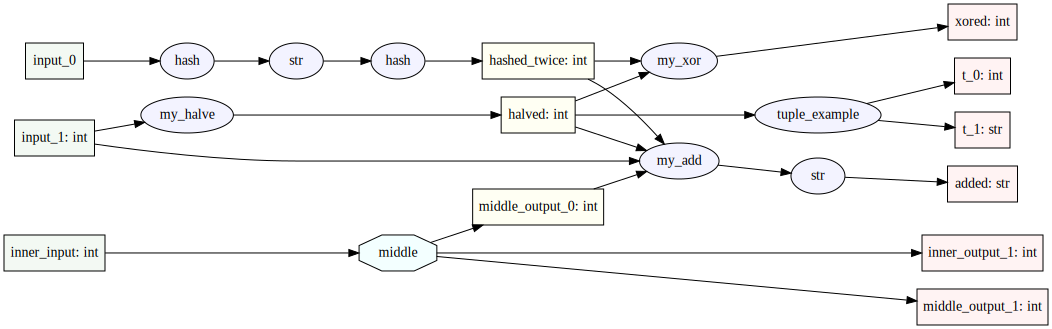

In [15]:
to_graphviz(graph=graph_with_subgraphs)

## Build CallableGraphWithTimings (with tuple return)

In [16]:
graph = (
    CallableGraphWithTimings.builder()
    .with_edge(hash, str, hash, inputs="input_0", outputs="hashed_twice")
    .with_edge(my_halve, inputs="input_1", outputs="halved")
    .with_edge(
        my_add, str, inputs=("hashed_twice", "halved", "input_1"), outputs="added"
    )
    .with_edge(my_xor, inputs=("halved", "hashed_twice"), outputs="xored")
    .with_edge(tuple_example, inputs="halved", outputs=("t_0", "t_1"))
    .with_edge(squared_sum, inputs=("halved", "hashed_twice"), outputs="squared_sum")
    .and_return("added", "t_0")
    .build()
)

## Visualise (with tuple return)

Output nodes have a different `alpha` value or transluscence.

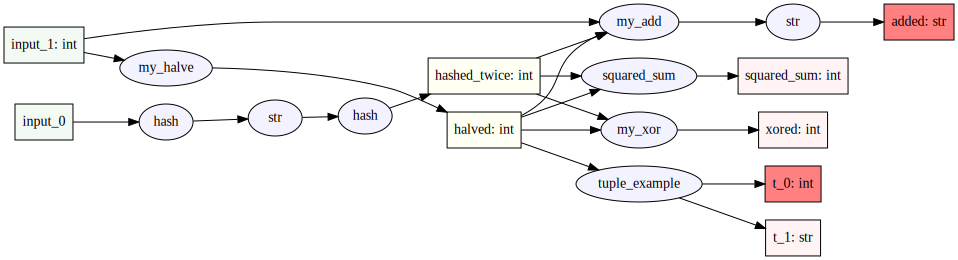

In [17]:
to_graphviz(graph)

## Output (with tuple return)

In [18]:
data, execution_times = graph(input_0="to_hash", input_1=8)

In [19]:
data

('8869828523515365236', 4)

# Logging

In [20]:
logged_graph = ExecutionLog.logged(graph)

In [21]:
ret, log = logged_graph(input_0="to_hash", input_1=8)

In [22]:
ret

('8869828523515365236', 4)

In [23]:
from pprint import pprint

pprint(log.dict())

{'component_info': [{'execution_time': 4.7109999998795615e-06,
                     'name': 'my_halve'},
                    {'execution_time': 1.9350000002305023e-06, 'name': 'hash'},
                    {'execution_time': 2.805000000272173e-06, 'name': 'str'},
                    {'execution_time': 1.7709999999837578e-06, 'name': 'hash'},
                    {'execution_time': 3.2430000000971404e-06,
                     'name': 'my_add'},
                    {'execution_time': 1.961999999799957e-06, 'name': 'str'},
                    {'execution_time': 1.979000000318365e-06, 'name': 'my_xor'},
                    {'execution_time': 3.962000000079513e-06,
                     'name': 'squared_sum'},
                    {'execution_time': 2.6709999998431044e-06,
                     'name': 'tuple_example'}],
 'exception': None,
 'execution_time': 0.00012999999999996348,
 'success': True}
